# Task 1

## Importing Data

In [1]:
# Importing dependencies needed for now
# For data loading and manipulation
import pandas as pd
import numpy as np

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile('../data/Customer_Churn_Raw.xlsx')

df1 = pd.read_excel(xls, 0)
df2 = pd.read_excel(xls, 1)
df3 = pd.read_excel(xls, 2)
df4 = pd.read_excel(xls, 3)
df5 = pd.read_excel(xls, 4)

In [3]:
dfs = [df1, df2, df3, df4, df5]

for i, df in enumerate(dfs, start=1):
    print(f"df{i}.head():")
    print(df.head(), '\n')

df1.head():
   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium 

df2.head():
   CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3           2           2998      2022-01-25       101.31       Furniture
4           2           1228      2022-07-24       397.37        Clothing 

df3.head():
   CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1           2           3329      2022-03-17    

## Preparing Tables for Joining

In [4]:
# Step 1: Aggregate transaction_history
df_transaction_agg = df2.groupby('CustomerID').agg(
    TotalPurchases = ('AmountSpent', 'count'),
    AvgSpend = ('AmountSpent', 'mean'),
    TotalSpend = ('AmountSpent', 'sum')
).reset_index()

In [5]:
# Step 2: Aggregate customer_service
df_service_agg = df3.groupby('CustomerID').agg(
    TotalInteractions = ('InteractionType', 'count'),
    ResolvedCount = ('ResolutionStatus', lambda x: (x == 'Resolved').sum())
).reset_index()

df_service_agg['ResolutionRate'] = df_service_agg['ResolvedCount'] / df_service_agg['TotalInteractions']

In [6]:
# Step 3: Make a copy of login_frequency
df_login_agg = df4.copy()

In [7]:
# Step 4: Join all the tables together
# Using customer_demographics as a base
master_df = df1.copy()

# Joining tables consisting of features
master_df = master_df.merge(df_transaction_agg, on='CustomerID', how='left')
master_df = master_df.merge(df_service_agg, on='CustomerID', how='left')
master_df = master_df.merge(df_login_agg, on='CustomerID', how='left')

# Joining table consisting of the label
master_df = master_df.merge(df5, on='CustomerID', how='left')

In [8]:
master_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalPurchases,AvgSpend,TotalSpend,TotalInteractions,ResolvedCount,ResolutionRate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,1,416.50000,416.50,1.0,1.0,1.0,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7,221.06000,1547.42,1.0,1.0,1.0,2023-12-05,5,Website,1
2,3,18,M,Single,Low,6,283.83000,1702.98,1.0,1.0,1.0,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,5,183.45800,917.29,2.0,1.0,0.5,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,8,250.18625,2001.49,NaN,NaN,NaN,2023-10-27,41,Website,0


## Exploratory Data Analysis

### Step 1: Initial Overview

In [9]:
# First few rows
master_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalPurchases,AvgSpend,TotalSpend,TotalInteractions,ResolvedCount,ResolutionRate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,1,416.50000,416.50,1.0,1.0,1.0,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7,221.06000,1547.42,1.0,1.0,1.0,2023-12-05,5,Website,1
2,3,18,M,Single,Low,6,283.83000,1702.98,1.0,1.0,1.0,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,5,183.45800,917.29,2.0,1.0,0.5,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,8,250.18625,2001.49,NaN,NaN,NaN,2023-10-27,41,Website,0


In [10]:
# Shape (rows, columns)
master_df.shape

(1000, 15)

In [11]:
# Column names
master_df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TotalPurchases', 'AvgSpend', 'TotalSpend', 'TotalInteractions',
       'ResolvedCount', 'ResolutionRate', 'LastLoginDate', 'LoginFrequency',
       'ServiceUsage', 'ChurnStatus'],
      dtype='object')

In [12]:
# Overview of the data types and count of non-null values for each column
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         1000 non-null   int64         
 1   Age                1000 non-null   int64         
 2   Gender             1000 non-null   object        
 3   MaritalStatus      1000 non-null   object        
 4   IncomeLevel        1000 non-null   object        
 5   TotalPurchases     1000 non-null   int64         
 6   AvgSpend           1000 non-null   float64       
 7   TotalSpend         1000 non-null   float64       
 8   TotalInteractions  668 non-null    float64       
 9   ResolvedCount      668 non-null    float64       
 10  ResolutionRate     668 non-null    float64       
 11  LastLoginDate      1000 non-null   datetime64[ns]
 12  LoginFrequency     1000 non-null   int64         
 13  ServiceUsage       1000 non-null   object        
 14  ChurnStat

**Note:** From this, it appears as though `TotalInteractions`, `ResolvedCount`, and `ResolutionRate` columns are made of one-third of null values. It may lead to ideas like dropping the three columns. However, since these are derived fields where the original fields couldn't be aggregated to the customer level, null values in these columns represent zero rather than missing values. Taking the `TotalInteractions` column as an example, a missing value just means that this particular customer didn't have an interaction with the bank's customer service.

In [13]:
# Looking into a few random rows from the table
master_df.sample(5)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalPurchases,AvgSpend,TotalSpend,TotalInteractions,ResolvedCount,ResolutionRate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
412,413,36,M,Widowed,Medium,5,318.522,1592.61,2.0,0.0,0.0,2023-03-16,33,Website,0
958,959,34,M,Divorced,Medium,1,285.350,285.35,NaN,NaN,NaN,2023-11-17,48,Online Banking,0
972,973,68,M,Single,Low,1,56.530,56.53,NaN,NaN,NaN,2023-10-18,31,Website,0
651,652,59,F,Single,Low,5,249.172,1245.86,2.0,0.0,0.0,2023-05-18,40,Website,0
440,441,24,F,Married,Medium,8,320.045,2560.36,1.0,0.0,0.0,2023-10-28,43,Mobile App,1


In [14]:
# Count of unique values per column
master_df.nunique()

CustomerID           1000
Age                    52
Gender                  2
MaritalStatus           4
IncomeLevel             3
TotalPurchases          9
AvgSpend              998
TotalSpend            997
TotalInteractions       2
ResolvedCount           3
ResolutionRate          3
LastLoginDate         340
LoginFrequency         49
ServiceUsage            3
ChurnStatus             2
dtype: int64

In [15]:
# Quick look at the number of missing values
master_df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
TotalPurchases         0
AvgSpend               0
TotalSpend             0
TotalInteractions    332
ResolvedCount        332
ResolutionRate       332
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64

In [16]:
# Another look at missing values but just the percentage
# Limiting results to three rows as we know only three columns contain missing values
master_df.isna().mean().sort_values(ascending=False).head(3)

TotalInteractions    0.332
ResolvedCount        0.332
ResolutionRate       0.332
dtype: float64

### Step 2: Data Types

In [17]:
# Checking the data type of each column
master_df.dtypes

CustomerID                    int64
Age                           int64
Gender                       object
MaritalStatus                object
IncomeLevel                  object
TotalPurchases                int64
AvgSpend                    float64
TotalSpend                  float64
TotalInteractions           float64
ResolvedCount               float64
ResolutionRate              float64
LastLoginDate        datetime64[ns]
LoginFrequency                int64
ServiceUsage                 object
ChurnStatus                   int64
dtype: object

**Note:** Everything seems to be in order. We can make some minor changes by converting the following columns from object type to category type:
- `Gender`
- `MaritalStatus`
- `IncomeLevel`
- `ServiceUsage`

These fields are naturally categorical so the converting them now before doing anything with them makes sense.

In [18]:
master_df['Gender'] = master_df['Gender'].astype('category')
master_df['MaritalStatus'] = master_df['MaritalStatus'].astype('category')
master_df['IncomeLevel'] = master_df['IncomeLevel'].astype('category')
master_df['ServiceUsage'] = master_df['ServiceUsage'].astype('category')

In [19]:
# Final check of data types
master_df.dtypes

CustomerID                    int64
Age                           int64
Gender                     category
MaritalStatus              category
IncomeLevel                category
TotalPurchases                int64
AvgSpend                    float64
TotalSpend                  float64
TotalInteractions           float64
ResolvedCount               float64
ResolutionRate              float64
LastLoginDate        datetime64[ns]
LoginFrequency                int64
ServiceUsage               category
ChurnStatus                   int64
dtype: object

### Step 3: Duplicate and Constant Value Checks

In [20]:
# Checking for duplicate rows
duplicate_rows = master_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [21]:
# Checking for constant columns
constant_cols = [col for col in master_df.columns if master_df[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

Constant columns: []


### Step 4: Missing Values

In [22]:
# Checking for null values (again) in each column
master_df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
TotalPurchases         0
AvgSpend               0
TotalSpend             0
TotalInteractions    332
ResolvedCount        332
ResolutionRate       332
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64

As mentioned earlier, these null values aren't missing values, it just means that these customers (332 of them) didn't have an interaction with customer service. To fix this, we'll just replace all null values in these columns with zeros.

In [23]:
master_df[['TotalInteractions', 'ResolvedCount', 'ResolutionRate']] = master_df[['TotalInteractions', 'ResolvedCount', 'ResolutionRate']].fillna(0)

In [24]:
# Just checking again...
master_df.isna().sum()

CustomerID           0
Age                  0
Gender               0
MaritalStatus        0
IncomeLevel          0
TotalPurchases       0
AvgSpend             0
TotalSpend           0
TotalInteractions    0
ResolvedCount        0
ResolutionRate       0
LastLoginDate        0
LoginFrequency       0
ServiceUsage         0
ChurnStatus          0
dtype: int64

### Step 5: Descriptive Statistics

#### 5.1 - Numerical Features

In [25]:
# Summary statistics
master_df.describe()

,CustomerID,Age,TotalPurchases,AvgSpend,TotalSpend,TotalInteractions,ResolvedCount,ResolutionRate,LastLoginDate,LoginFrequency,ChurnStatus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,43.267000,5.054000,248.806511,1267.074950,1.002000,0.523000,0.352500,2023-07-05 21:28:48,25.912000,0.204000
min,1.000000,18.000000,1.000000,9.800000,9.800000,0.000000,0.000000,0.000000,2023-01-01 00:00:00,1.000000,0.000000
25%,250.750000,30.000000,3.000000,203.734167,626.685000,0.000000,0.000000,0.000000,2023-04-08 00:00:00,13.750000,0.000000
50%,500.500000,43.000000,5.000000,250.121458,1232.880000,1.000000,0.000000,0.000000,2023-07-10 12:00:00,27.000000,0.000000
75%,750.250000,56.000000,7.000000,295.023854,1791.902500,2.000000,1.000000,1.000000,2023-10-01 06:00:00,38.000000,0.000000
max,1000.000000,69.000000,9.000000,496.990000,3386.040000,2.000000,2.000000,1.000000,2023-12-31 00:00:00,49.000000,1.000000
std,288.819436,15.242311,2.603433,79.372766,738.590013,0.816494,0.632353,0.425058,NaN,14.055953,0.403171


##### 5.1.1 - Age

In [26]:
master_df['Age'].describe()

count    1000.000000
mean       43.267000
std        15.242311
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

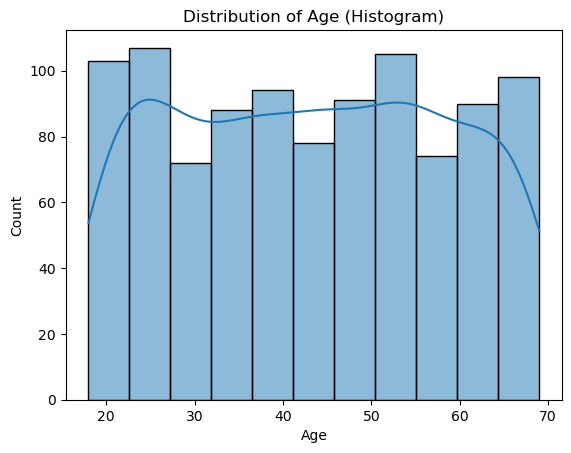

In [27]:
# Distribution plot 1
sns.histplot(master_df['Age'], kde=True)
plt.title('Distribution of Age (Histogram)')
plt.show()

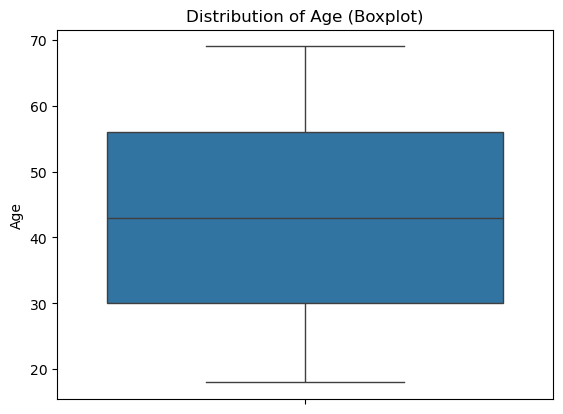

In [28]:
# Distribution plot 2
sns.boxplot(master_df['Age'])
plt.title('Distribution of Age (Boxplot)')
plt.show()

From visuals inspections, mainly the boxplot, there appears to be no outliers for the Age field. Nevertheless, these can be calculated if they are there and an appriopriate method will be applied if needed in a later section.

In [29]:
# IQR & Outlier calculation
Q1_age = master_df['Age'].quantile(0.25)
Q3_age = master_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
outliers_age = master_df[(master_df['Age'] < lower_age) | (master_df['Age'] > upper_age)]

print("Number of outliers in Age:", outliers_age.shape[0])

Number of outliers in Age: 0


##### 5.1.2 - TotalPurchases

In [30]:
master_df['TotalPurchases'].describe()

count    1000.000000
mean        5.054000
std         2.603433
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: TotalPurchases, dtype: float64

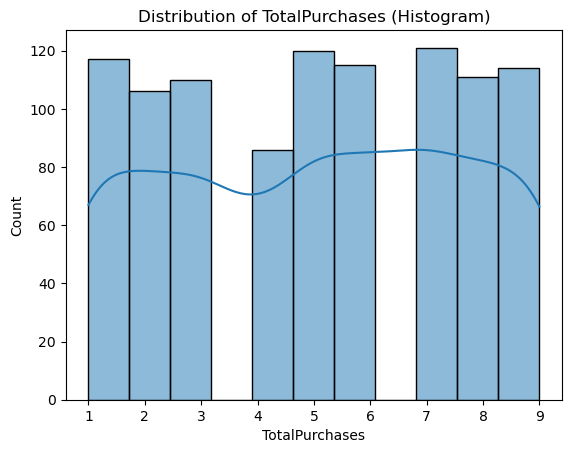

In [31]:
# Distribution plot 1
sns.histplot(master_df['TotalPurchases'], kde=True)
plt.title('Distribution of TotalPurchases (Histogram)')
plt.show()

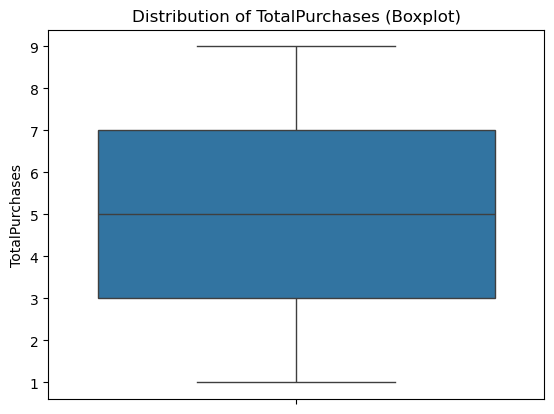

In [32]:
# Distribution plot 2
sns.boxplot(master_df['TotalPurchases'])
plt.title('Distribution of TotalPurchases (Boxplot)')
plt.show()

In [33]:
# IQR & Outlier calculation
Q1_totpur = master_df['TotalPurchases'].quantile(0.25)
Q3_totpur = master_df['TotalPurchases'].quantile(0.75)
IQR_totpur = Q3_totpur - Q1_totpur

lower_totpur = Q1_totpur - 1.5 * IQR_totpur
upper_totpur = Q3_totpur + 1.5 * IQR_totpur
outliers_totpur = master_df[(master_df['TotalPurchases'] < lower_totpur) | (master_df['TotalPurchases'] > upper_totpur)]

print("Number of outliers in TotalPurchases:", outliers_totpur.shape[0])

Number of outliers in TotalPurchases: 0


##### 5.1.3 - AvgSpend

In [34]:
master_df['AvgSpend'].describe()

count    1000.000000
mean      248.806511
std        79.372766
min         9.800000
25%       203.734167
50%       250.121458
75%       295.023854
max       496.990000
Name: AvgSpend, dtype: float64

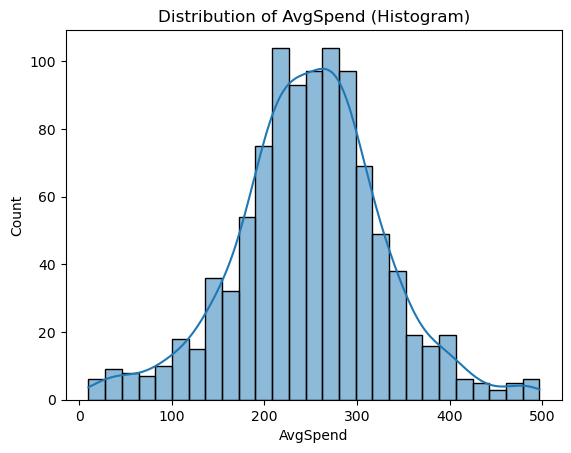

In [35]:
# Distribution plot 1
sns.histplot(master_df['AvgSpend'], kde=True)
plt.title('Distribution of AvgSpend (Histogram)')
plt.show()

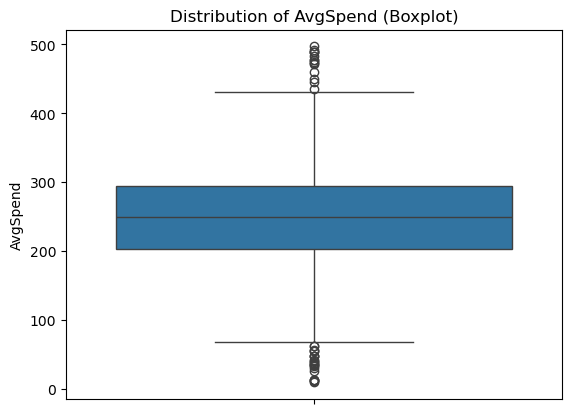

In [36]:
# Distribution plot 2
sns.boxplot(master_df['AvgSpend'])
plt.title('Distribution of AvgSpend (Boxplot)')
plt.show()

Outliers!! Let's have a look at these, how many there are and just think what action would be most appropriate in this situation

In [37]:
Q1_avgspe = master_df['AvgSpend'].quantile(0.25)
Q3_avgspe = master_df['AvgSpend'].quantile(0.75)
IQR_avgspe = Q3_avgspe - Q1_avgspe

lower_avgspe = Q1_avgspe - 1.5 * IQR_avgspe
upper_avgspe = Q3_avgspe + 1.5 * IQR_avgspe
outliers_avgspe = master_df[(master_df['AvgSpend'] < lower_avgspe) | (master_df['AvgSpend'] > upper_avgspe)]

print("Number of outliers in AvgSpend:", outliers_avgspe.shape[0])

Number of outliers in AvgSpend: 38


In [38]:
outliers_avgspe['AvgSpend']

100    492.350
147     13.040
148    444.840
158     25.750
183     48.595
260    489.070
262     13.040
265    459.390
288     30.480
298      9.800
312     34.910
318    477.460
321     61.980
337     13.860
371     35.850
386     47.520
433     41.190
434    488.450
458     62.870
460    449.870
566    472.360
629    471.220
646     12.460
665    474.380
695     55.770
706     35.240
759    477.750
763    496.990
773     41.490
810    435.555
849     38.120
853     47.850
873    488.210
898     38.780
906     54.820
956     32.800
972     56.530
989    483.500
Name: AvgSpend, dtype: float64

##### 5.1.4 - TotalSpend

In [39]:
master_df['TotalSpend'].describe()

count    1000.000000
mean     1267.074950
std       738.590013
min         9.800000
25%       626.685000
50%      1232.880000
75%      1791.902500
max      3386.040000
Name: TotalSpend, dtype: float64

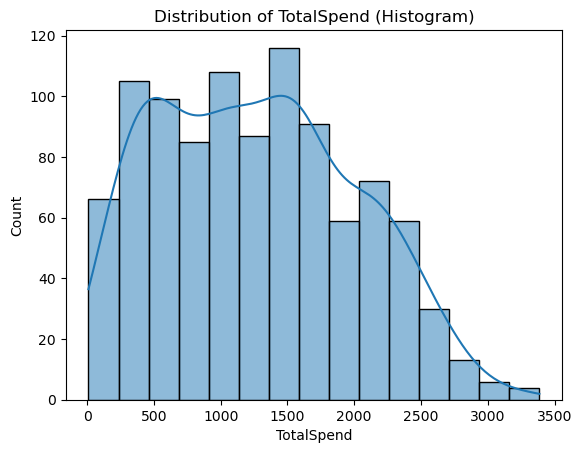

In [40]:
# Distribution plot 1
sns.histplot(master_df['TotalSpend'], kde=True)
plt.title('Distribution of TotalSpend (Histogram)')
plt.show()

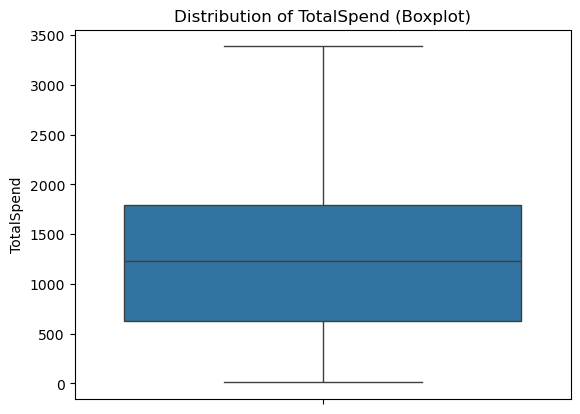

In [41]:
# Distribution plot 2
sns.boxplot(master_df['TotalSpend'])
plt.title('Distribution of TotalSpend (Boxplot)')
plt.show()

In [42]:
Q1_totspe = master_df['TotalSpend'].quantile(0.25)
Q3_totspe = master_df['TotalSpend'].quantile(0.75)
IQR_totspe = Q3_totspe - Q1_totspe

lower_totspe = Q1_totspe - 1.5 * IQR_totspe
upper_totspe = Q3_totspe + 1.5 * IQR_totspe
outliers_totspe = master_df[(master_df['TotalSpend'] < lower_totspe) | (master_df['TotalSpend'] > upper_totspe)]

print("Number of outliers in TotalSpend:", outliers_totspe.shape[0])

Number of outliers in TotalSpend: 0


##### 5.1.5 - TotalInteractions

In [43]:
master_df['TotalInteractions'].describe()

count    1000.000000
mean        1.002000
std         0.816494
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: TotalInteractions, dtype: float64

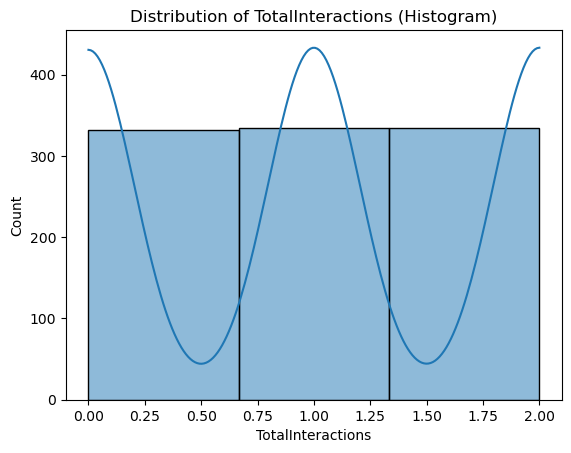

In [44]:
# Distribution plot 1
sns.histplot(master_df['TotalInteractions'], kde=True, bins=3)
plt.title('Distribution of TotalInteractions (Histogram)')
plt.show()

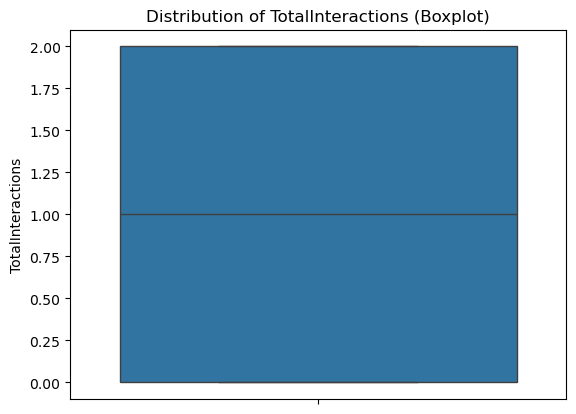

In [45]:
# Distribution plot 2
sns.boxplot(master_df['TotalInteractions'])
plt.title('Distribution of TotalInteractions (Boxplot)')
plt.show()

No need of computing the number of outliers or anything in this case using the IQR method.

##### 5.1.6 - ResolvedCount

In [46]:
master_df['ResolvedCount'].describe()

count    1000.000000
mean        0.523000
std         0.632353
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: ResolvedCount, dtype: float64

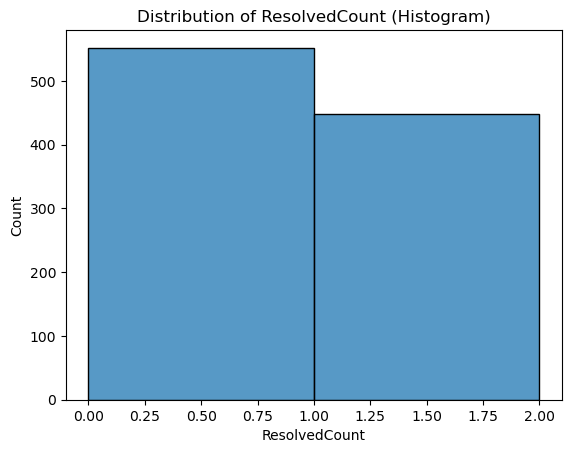

In [47]:
# Distribution plot 1
sns.histplot(master_df['ResolvedCount'], bins=2)
plt.title('Distribution of ResolvedCount (Histogram)')
plt.show()

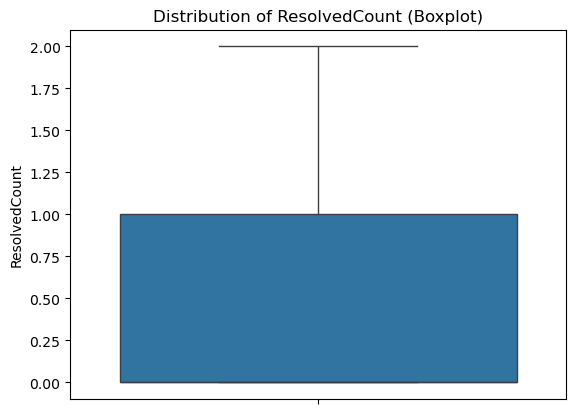

In [48]:
# Distribution plot 2
sns.boxplot(master_df['ResolvedCount'])
plt.title('Distribution of ResolvedCount (Boxplot)')
plt.show()

In [49]:
Q1_rescou = master_df['ResolvedCount'].quantile(0.25)
Q3_rescou = master_df['ResolvedCount'].quantile(0.75)
IQR_rescou = Q3_rescou - Q1_rescou

lower_rescou = Q1_rescou - 1.5 * IQR_rescou
upper_rescou = Q3_rescou + 1.5 * IQR_rescou
outliers_rescou = master_df[(master_df['ResolvedCount'] < lower_rescou) | (master_df['ResolvedCount'] > upper_rescou)]

print("Number of outliers in ResolvedCount:", outliers_rescou.shape[0])

Number of outliers in ResolvedCount: 0


##### 5.1.7 - ResolutionRate

In [50]:
master_df['ResolutionRate'].describe()

count    1000.000000
mean        0.352500
std         0.425058
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ResolutionRate, dtype: float64

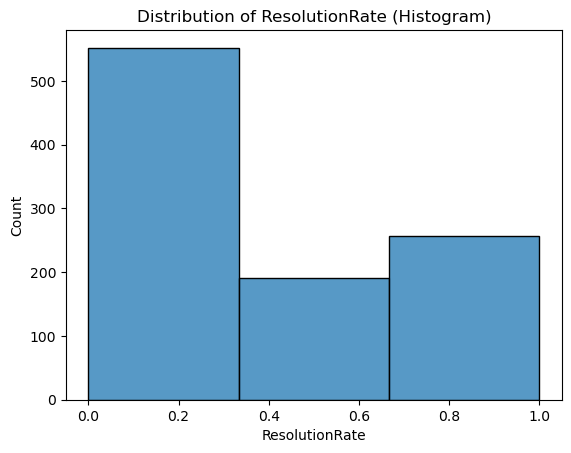

In [51]:
# Distribution plot 1
sns.histplot(master_df['ResolutionRate'], bins=3)
plt.title('Distribution of ResolutionRate (Histogram)')
plt.show()

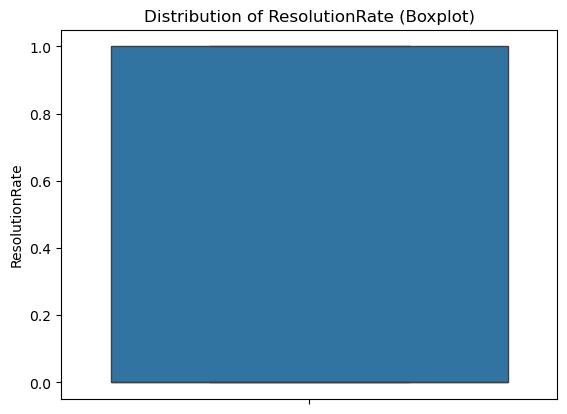

In [52]:
# Distribution plot 2
sns.boxplot(master_df['ResolutionRate'])
plt.title('Distribution of ResolutionRate (Boxplot)')
plt.show()

In [53]:
Q1_resrate = master_df['ResolutionRate'].quantile(0.25)
Q3_resrate = master_df['ResolutionRate'].quantile(0.75)
IQR_resrate = Q3_resrate - Q1_resrate

lower_resrate = Q1_resrate - 1.5 * IQR_resrate
upper_resrate = Q3_resrate + 1.5 * IQR_resrate
outliers_resrate = master_df[(master_df['ResolutionRate'] < lower_resrate) | (master_df['ResolutionRate'] > upper_resrate)]

print("Number of outliers in ResolutionRate:", outliers_resrate.shape[0])

Number of outliers in ResolutionRate: 0


##### 5.1.8 - LoginFrequency

In [54]:
master_df['LoginFrequency'].describe()

count    1000.000000
mean       25.912000
std        14.055953
min         1.000000
25%        13.750000
50%        27.000000
75%        38.000000
max        49.000000
Name: LoginFrequency, dtype: float64

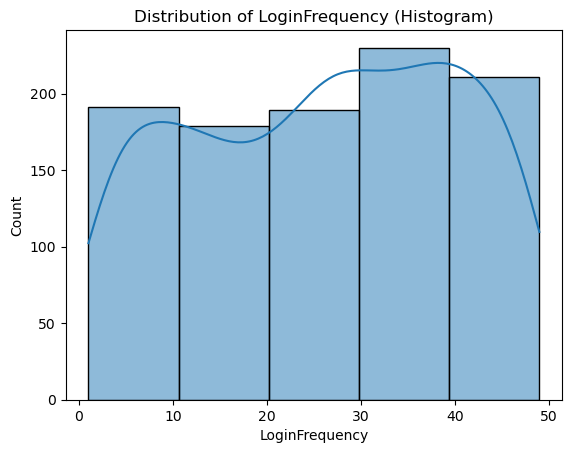

In [55]:
# Distribution plot 1
sns.histplot(master_df['LoginFrequency'], kde=True, bins=5)
plt.title('Distribution of LoginFrequency (Histogram)')
plt.show()

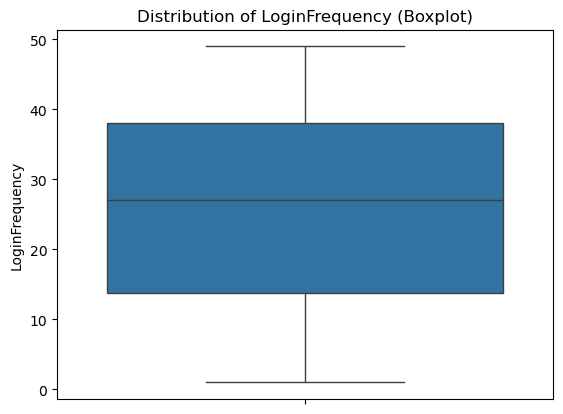

In [56]:
# Distribution plot 2
sns.boxplot(master_df['LoginFrequency'])
plt.title('Distribution of LoginFrequency (Boxplot)')
plt.show()

In [57]:
Q1_logfre = master_df['LoginFrequency'].quantile(0.25)
Q3_logfre = master_df['LoginFrequency'].quantile(0.75)
IQR_logfre = Q3_logfre - Q1_logfre

lower_logfre = Q1_logfre - 1.5 * IQR_logfre
upper_logfre = Q3_logfre + 1.5 * IQR_logfre
outliers_logfre = master_df[(master_df['LoginFrequency'] < lower_logfre) | (master_df['LoginFrequency'] > upper_logfre)]

print("Number of outliers in LoginFrequency:", outliers_logfre.shape[0])

Number of outliers in LoginFrequency: 0


#### 5.2 - Categorical Features

##### 5.2.1 - IncomeLevel

In [58]:
# Get an idea of the categories and relative frequencies
master_df['IncomeLevel'].value_counts(normalize=True)

IncomeLevel
High      0.349
Medium    0.326
Low       0.325
Name: proportion, dtype: float64

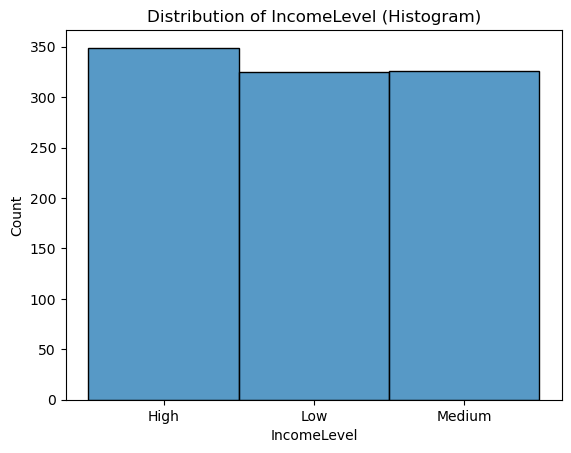

In [59]:
# Distribution plot 1
sns.histplot(master_df['IncomeLevel'])
plt.title('Distribution of IncomeLevel (Histogram)')
plt.show()

##### 5.2.2 - ServiceUsage

In [60]:
master_df['ServiceUsage'].value_counts(normalize=True)

ServiceUsage
Online Banking    0.349
Mobile App        0.342
Website           0.309
Name: proportion, dtype: float64

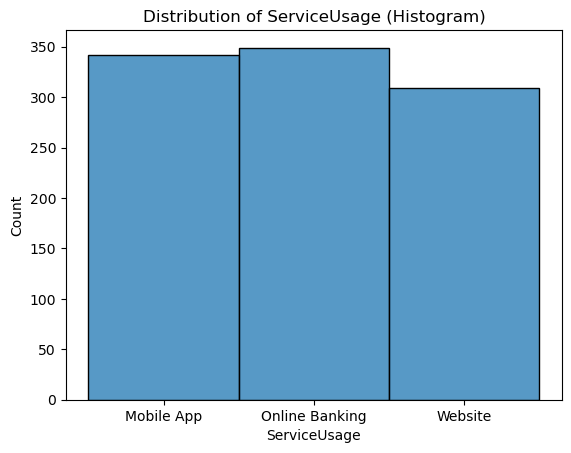

In [61]:
# Distribution plot 1
sns.histplot(master_df['ServiceUsage'])
plt.title('Distribution of ServiceUsage (Histogram)')
plt.show()

#### 5.3 - Target Variable Analysis

In [62]:
master_df['ChurnStatus'].value_counts(normalize=True)

ChurnStatus
0    0.796
1    0.204
Name: proportion, dtype: float64

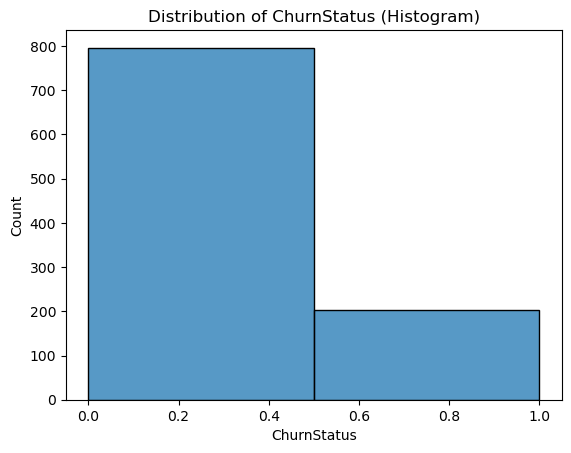

In [63]:
# Distribution plot 1
sns.histplot(master_df['ChurnStatus'], bins=2)
plt.title('Distribution of ChurnStatus (Histogram)')
plt.show()

### Step 7: Bivariate Visuals

#### 7.1 - Numerical Features

##### 7.1.1 - Age

In [64]:
master_df['ChurnStatus'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: ChurnStatus
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


**Note:** Since the target variable `ChurnStatus` is retained as an integer for compatibility with modelling, an additional step is required when visualising it in plots. Specifically, the field must be temporarily cast to a character or categorical type within the plotting function. This ensures that the values 0 and 1 are treated as two distinct categories rather than as points on a continuous numerical scale. While one might consider converting the column in the dataset itself, doing so would be inappropriate for later modelling steps, where numerical format is essential.

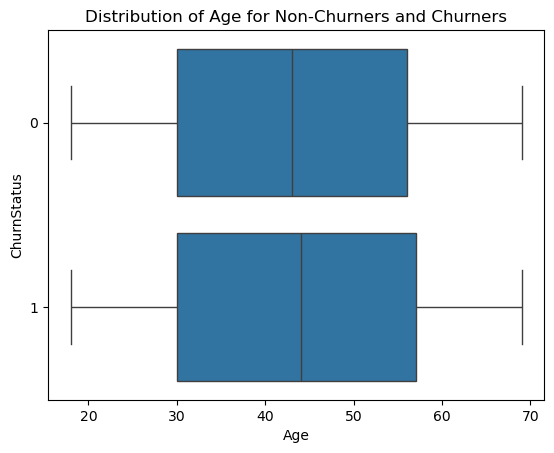

In [65]:
# Boxplot
sns.boxplot(y=master_df['ChurnStatus'].astype(str), x='Age', data=master_df)
plt.title("Distribution of Age for Non-Churners and Churners")
plt.show()

In [66]:
master_df.groupby('ChurnStatus')['Age'].agg(['mean', 'median'])

,mean,median
ChurnStatus,,
0,43.040201,43.0
1,44.151961,44.0


##### 7.1.2 - TotalPurchases

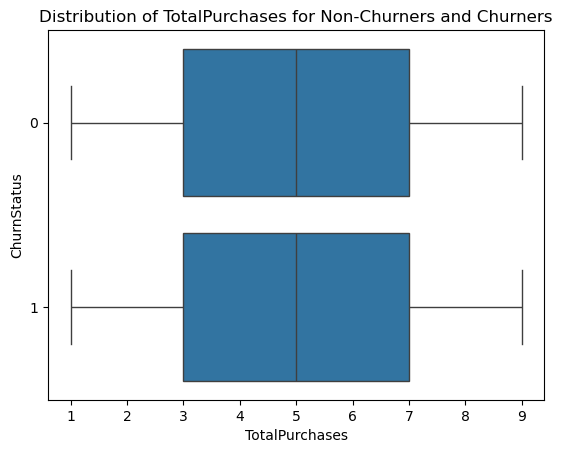

In [67]:
# Boxplot
sns.boxplot(x='TotalPurchases', y=master_df['ChurnStatus'].astype(str),
            data=master_df)
plt.title("Distribution of TotalPurchases for Non-Churners and Churners")
plt.show()

In [68]:
master_df.groupby('ChurnStatus')['TotalPurchases'].agg(['mean', 'median'])

,mean,median
ChurnStatus,,
0,5.065327,5.0
1,5.009804,5.0


##### 7.1.3 - AvgSpend

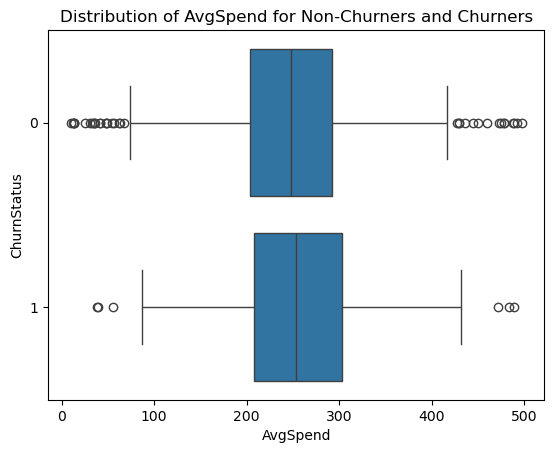

In [69]:
# Boxplot
sns.boxplot(x='AvgSpend', y=master_df['ChurnStatus'].astype(str),
            data=master_df)
plt.title("Distribution of AvgSpend for Non-Churners and Churners")
plt.show()


In [70]:
master_df.groupby('ChurnStatus')['AvgSpend'].agg(['mean', 'median'])

,mean,median
ChurnStatus,,
0,247.006812,248.280000
1,255.828867,252.709643


##### 7.1.4 - TotalSpend

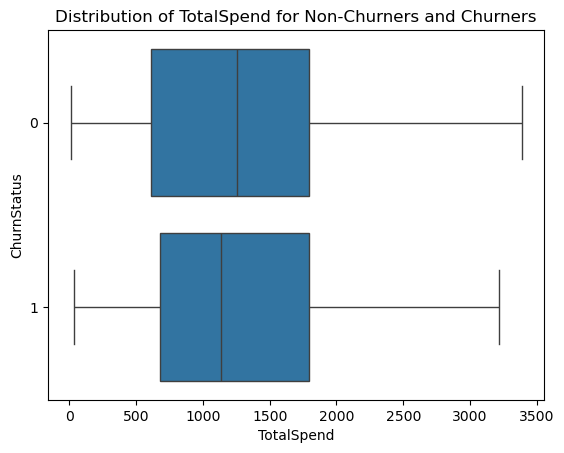

In [71]:
# Boxplot
sns.boxplot(x='TotalSpend', y=master_df['ChurnStatus'].astype(str),
            data=master_df)
plt.title("Distribution of TotalSpend for Non-Churners and Churners")
plt.show()

In [72]:
master_df.groupby('ChurnStatus')['TotalSpend'].agg(['mean', 'median'])

,mean,median
ChurnStatus,,
0,1266.580038,1255.36
1,1269.006078,1135.37


##### 7.1.5 - LoginFrequency

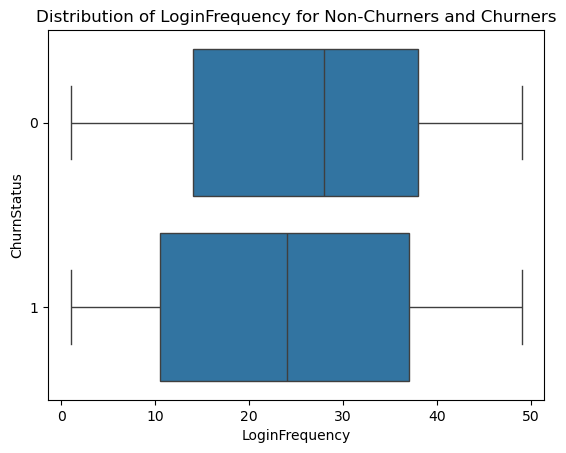

In [73]:
# Boxplot
sns.boxplot(x='LoginFrequency', y=master_df['ChurnStatus'].astype(str),
            data=master_df)
plt.title("Distribution of LoginFrequency for Non-Churners and Churners")
plt.show()

In [74]:
master_df.groupby('ChurnStatus')['LoginFrequency'].agg(['mean', 'median'])

,mean,median
ChurnStatus,,
0,26.492462,28.0
1,23.647059,24.0


##### 7.1.6 - ResolutionRate

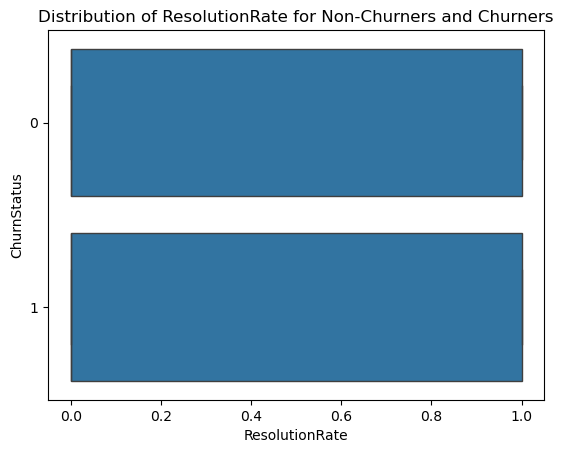

In [75]:
# Boxplot
sns.boxplot(x='ResolutionRate', y=master_df['ChurnStatus'].astype(str),
            data=master_df)
plt.title("Distribution of ResolutionRate for Non-Churners and Churners")
plt.show()

In [76]:
master_df.groupby('ChurnStatus')['ResolutionRate'].agg(['mean', 'median'])

,mean,median
ChurnStatus,,
0,0.350503,0.0
1,0.360294,0.0


#### 7.2 - Categorical Features

##### 7.2.1 - IncomeLevel

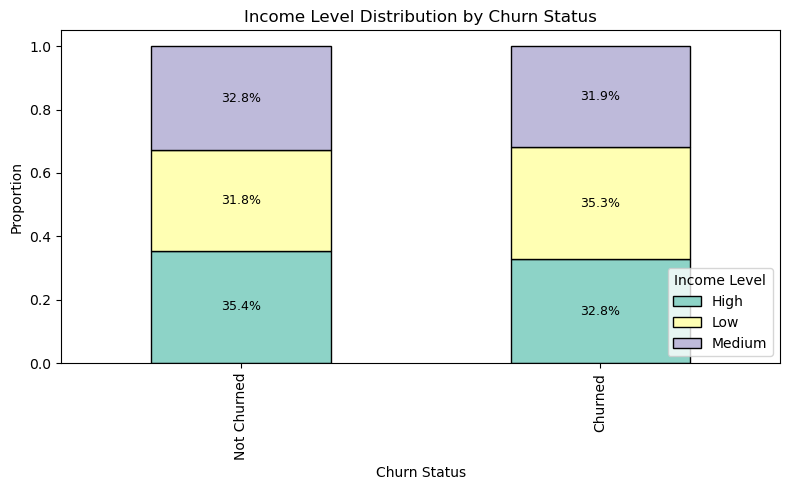

In [77]:
colors = ['#8dd3c7', '#ffffb3', '#bebada']  # Teal, Yellow, Lavender
stacked_data_income = pd.crosstab(master_df['ChurnStatus'], 
                           master_df['IncomeLevel'], 
                           normalize='index')

# Plot
ax = stacked_data_income.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    figsize=(8, 5)
)

# Annotate each bar segment with percentage
for i, row in stacked_data_income.iterrows():
    cumulative = 0
    for j, val in enumerate(row):
        height = val
        if height > 0.01:
            ax.text(
                x=i,
                y=cumulative + height / 2,
                s=f'{height*100:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
        cumulative += height

# Final formatting
ax.set_xlabel('Churn Status')
ax.set_ylabel('Proportion')
ax.set_title('Income Level Distribution by Churn Status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Churned', 'Churned'])
ax.legend(title='Income Level', loc='lower right')
plt.tight_layout()
plt.show()

In [78]:
churn_rate_by_income = pd.crosstab(master_df['IncomeLevel'], 
                                     master_df['ChurnStatus'], normalize='index')

churn_rate_by_income.columns = ['Not Churned', 'Churned']

churn_rate_by_income = churn_rate_by_income * 100

print(churn_rate_by_income)

             Not Churned    Churned
IncomeLevel                        
High           80.802292  19.197708
Low            77.846154  22.153846
Medium         80.061350  19.938650


##### 7.2.2 - ServiceUsage

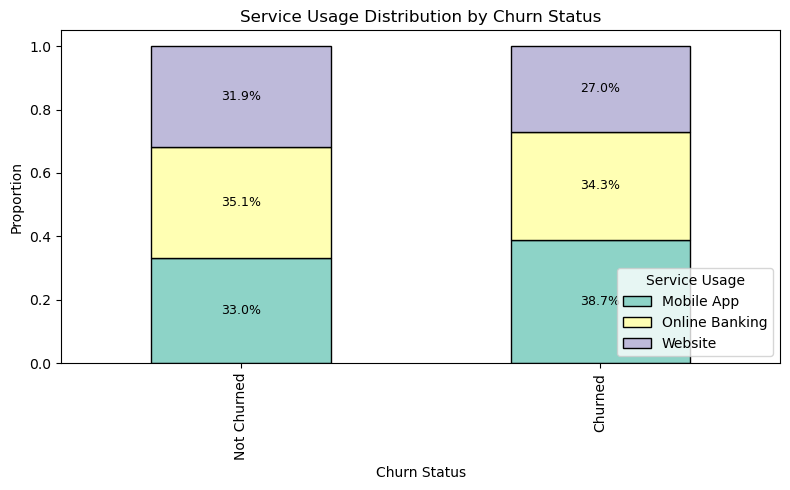

In [79]:
colors = ['#8dd3c7', '#ffffb3', '#bebada']  # Teal, Yellow, Lavender

stacked_data_service = pd.crosstab(master_df['ChurnStatus'], 
                           master_df['ServiceUsage'], 
                           normalize='index')

# Plot
ax = stacked_data_service.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    figsize=(8, 5)
)

# Annotate each bar segment with percentage
for i, row in stacked_data_service.iterrows():
    cumulative = 0
    for j, val in enumerate(row):
        height = val
        if height > 0.01:
            ax.text(
                x=i,
                y=cumulative + height / 2,
                s=f'{height*100:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
        cumulative += height

# Final formatting
ax.set_xlabel('Churn Status')
ax.set_ylabel('Proportion')
ax.set_title('Service Usage Distribution by Churn Status')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Churned', 'Churned'])
ax.legend(title='Service Usage', loc='lower right')
plt.tight_layout()
plt.show()

In [80]:
churn_rate_by_service = pd.crosstab(master_df['ServiceUsage'], 
                                     master_df['ChurnStatus'], normalize='index')

churn_rate_by_service.columns = ['Not Churned', 'Churned']

churn_rate_by_service = churn_rate_by_service * 100

print(churn_rate_by_service)

                Not Churned    Churned
ServiceUsage                          
Mobile App        76.900585  23.099415
Online Banking    79.942693  20.057307
Website           82.200647  17.799353


### Step 8 - Correlation Matrix

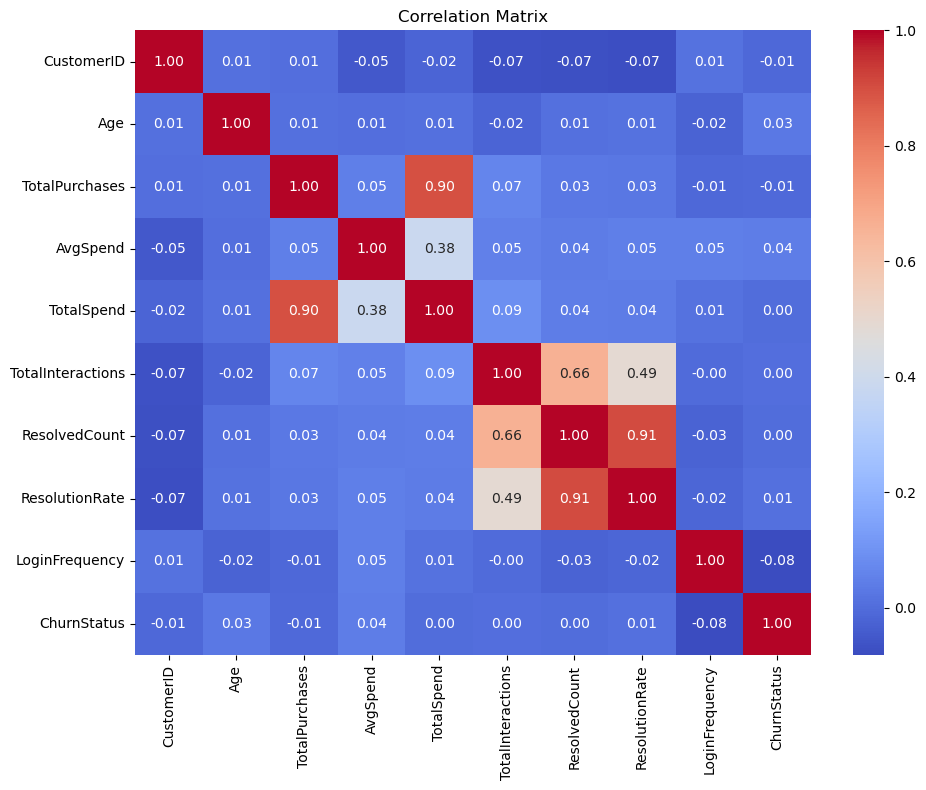

In [81]:
plt.figure(figsize=(10, 8))
corr_matrix = master_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Step 9 - Preliminary Feature Importance

#### 9.1 - Numerical Features

In [85]:
grouped_means = master_df.groupby('ChurnStatus').mean(numeric_only=True).T

grouped_means.columns = ['Non-Churners (0)', 'Churners (1)']

grouped_means['Difference'] = grouped_means['Churners (1)'] - grouped_means['Non-Churners (0)']

grouped_means.sort_values(by='Difference', ascending=False)

,Non-Churners (0),Churners (1),Difference
AvgSpend,247.006812,255.828867,8.822054
TotalSpend,1266.580038,1269.006078,2.426041
Age,43.040201,44.151961,1.111760
TotalInteractions,1.000000,1.009804,0.009804
ResolutionRate,0.350503,0.360294,0.009792
ResolvedCount,0.522613,0.524510,0.001897
TotalPurchases,5.065327,5.009804,-0.055523
LoginFrequency,26.492462,23.647059,-2.845403
CustomerID,502.184673,493.926471,-8.258203


#### 9.2 - Categorical Features

In [87]:
income_df = pd.crosstab(master_df['IncomeLevel'], master_df['ChurnStatus'],
                        normalize='index') * 100
income_df = income_df.round(2)
income_df['Category'] = 'Income Level'
income_df = income_df.reset_index().rename(columns={'IncomeLevel': 'Value'})

service_df = pd.crosstab(master_df['ServiceUsage'], master_df['ChurnStatus'], 
                         normalize='index') * 100
service_df = service_df.round(2)
service_df['Category'] = 'Service Usage'
service_df = service_df.reset_index().rename(columns={'ServiceUsage': 'Value'})

combined_df = pd.concat([income_df, service_df], ignore_index=True)

combined_df = combined_df.rename(columns={0: 'Non-Churn %', 1: 'Churn %'})

combined_df = combined_df[['Category', 'Value', 'Non-Churn %', 'Churn %']]

combined_df

ChurnStatus,Category,Value,Non-Churn %,Churn %
0,Income Level,High,80.80,19.20
1,Income Level,Low,77.85,22.15
2,Income Level,Medium,80.06,19.94
3,Service Usage,Mobile App,76.90,23.10
4,Service Usage,Online Banking,79.94,20.06
5,Service Usage,Website,82.20,17.80


## Cleaning and Preprocessing

### Step 2 - Outlier Treatment

In [88]:
Q1_out = master_df['AvgSpend'].quantile(0.25)
Q3_out = master_df['AvgSpend'].quantile(0.75)
IQR_out = Q3_out - Q1_out

lower_bound_out = Q1_out - 1.5 * IQR_out
upper_bound_out = Q3_out + 1.5 * IQR_out

outliers_out = master_df[(master_df['AvgSpend'] < lower_bound_out) | 
                         (master_df['AvgSpend'] > upper_bound_out)]

print(f"Number of outliers: {len(outliers_out)}")

Number of outliers: 38


In [89]:
outliers_churn_dist = outliers_out['ChurnStatus'].value_counts(normalize=True) * 100
print(outliers_churn_dist)

ChurnStatus
0    84.210526
1    15.789474
Name: proportion, dtype: float64


In [90]:
df_no_outliers = master_df[(master_df['AvgSpend'] >= lower_bound_out) & 
                           (master_df['AvgSpend'] <= upper_bound_out)]

print("Original AvgSpend mean:", master_df['AvgSpend'].mean())
print("No-outlier AvgSpend mean:", df_no_outliers['AvgSpend'].mean())

Original AvgSpend mean: 248.80651145634923
No-outlier AvgSpend mean: 250.3662904951655


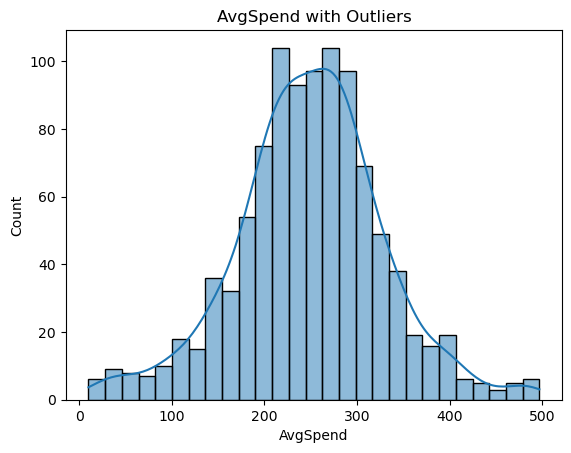

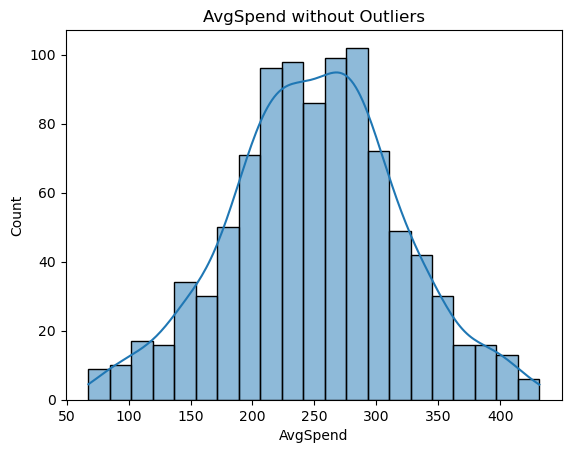

In [91]:
sns.histplot(master_df['AvgSpend'], kde=True)
plt.title("AvgSpend with Outliers")
plt.show()

sns.histplot(df_no_outliers['AvgSpend'], kde=True)
plt.title("AvgSpend without Outliers")
plt.show()

In [94]:
# Removing the outlier records
master_df = master_df[(master_df['AvgSpend'] >= lower_bound_out) &
                      (master_df['AvgSpend'] <= upper_bound_out)]

In [95]:
master_df.shape

(962, 15)

### Step 3 - Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
numerical_features = ['Age', 'TotalPurchases', 'AvgSpend', 'TotalSpend',
                      'LoginFrequency', 'ResolutionRate']

In [99]:
scaled_values = scaler.fit_transform(master_df[numerical_features])

In [100]:
scaled_df = pd.DataFrame(scaled_values, 
                         columns=[f"{col}_scaled" for col in numerical_features])

In [101]:
master_df = pd.concat([master_df.reset_index(drop=True), scaled_df], axis=1)

In [103]:
master_df = master_df.drop(columns=numerical_features)

In [104]:
master_df.head()

,CustomerID,Gender,MaritalStatus,IncomeLevel,TotalInteractions,ResolvedCount,LastLoginDate,ServiceUsage,ChurnStatus,Age_scaled,TotalPurchases_scaled,AvgSpend_scaled,TotalSpend_scaled,LoginFrequency_scaled,ResolutionRate_scaled
0,1,M,Single,Low,1.0,1.0,2023-10-21,Mobile App,0,1.227722,-1.666262,2.431016,-1.236035,0.577540,1.511436
1,2,M,Married,Low,1.0,1.0,2023-12-05,Website,1,1.424097,0.707884,-0.428836,0.332187,-1.495303,1.511436
2,3,M,Single,Low,1.0,1.0,2023-11-15,Website,0,-1.652454,0.312193,0.489671,0.547898,-1.638257,1.511436
3,4,M,Widowed,Low,2.0,1.0,2023-08-25,Website,0,-1.456078,-0.083498,-0.979062,-0.541601,-1.709735,0.338854
4,5,M,Divorced,Medium,0.0,0.0,2023-10-27,Website,0,-1.456078,1.103575,-0.002635,0.961836,1.077881,-0.833727


### Step 4 - Encoding Categorical Features

In [105]:
# Encoding IncomeLevel and ServiceUsage
master_df = pd.get_dummies(master_df, columns=['IncomeLevel', 'ServiceUsage'],
                           drop_first=True)

In [106]:
master_df.head()

,CustomerID,Gender,MaritalStatus,TotalInteractions,ResolvedCount,LastLoginDate,ChurnStatus,Age_scaled,TotalPurchases_scaled,AvgSpend_scaled,TotalSpend_scaled,LoginFrequency_scaled,ResolutionRate_scaled,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website
0,1,M,Single,1.0,1.0,2023-10-21,0,1.227722,-1.666262,2.431016,-1.236035,0.577540,1.511436,True,False,False,False
1,2,M,Married,1.0,1.0,2023-12-05,1,1.424097,0.707884,-0.428836,0.332187,-1.495303,1.511436,True,False,False,True
2,3,M,Single,1.0,1.0,2023-11-15,0,-1.652454,0.312193,0.489671,0.547898,-1.638257,1.511436,True,False,False,True
3,4,M,Widowed,2.0,1.0,2023-08-25,0,-1.456078,-0.083498,-0.979062,-0.541601,-1.709735,0.338854,True,False,False,True
4,5,M,Divorced,0.0,0.0,2023-10-27,0,-1.456078,1.103575,-0.002635,0.961836,1.077881,-0.833727,False,True,False,True


In [107]:
master_df['Interacted'] = (master_df['TotalInteractions'] > 0).astype(int)

In [108]:
master_df.drop(columns='TotalInteractions', inplace=True)

In [109]:
master_df.head()

,CustomerID,Gender,MaritalStatus,ResolvedCount,LastLoginDate,ChurnStatus,Age_scaled,TotalPurchases_scaled,AvgSpend_scaled,TotalSpend_scaled,LoginFrequency_scaled,ResolutionRate_scaled,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,Interacted
0,1,M,Single,1.0,2023-10-21,0,1.227722,-1.666262,2.431016,-1.236035,0.577540,1.511436,True,False,False,False,1
1,2,M,Married,1.0,2023-12-05,1,1.424097,0.707884,-0.428836,0.332187,-1.495303,1.511436,True,False,False,True,1
2,3,M,Single,1.0,2023-11-15,0,-1.652454,0.312193,0.489671,0.547898,-1.638257,1.511436,True,False,False,True,1
3,4,M,Widowed,1.0,2023-08-25,0,-1.456078,-0.083498,-0.979062,-0.541601,-1.709735,0.338854,True,False,False,True,1
4,5,M,Divorced,0.0,2023-10-27,0,-1.456078,1.103575,-0.002635,0.961836,1.077881,-0.833727,False,True,False,True,0


### Step 5 - Final Feature Selection

In [112]:
final_master_df = master_df.drop(columns=['CustomerID',
                                          'ResolvedCount',
                                          'TotalPurchases_scaled'])

In [113]:
final_master_df.head()

,Gender,MaritalStatus,LastLoginDate,ChurnStatus,Age_scaled,AvgSpend_scaled,TotalSpend_scaled,LoginFrequency_scaled,ResolutionRate_scaled,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,Interacted
0,M,Single,2023-10-21,0,1.227722,2.431016,-1.236035,0.577540,1.511436,True,False,False,False,1
1,M,Married,2023-12-05,1,1.424097,-0.428836,0.332187,-1.495303,1.511436,True,False,False,True,1
2,M,Single,2023-11-15,0,-1.652454,0.489671,0.547898,-1.638257,1.511436,True,False,False,True,1
3,M,Widowed,2023-08-25,0,-1.456078,-0.979062,-0.541601,-1.709735,0.338854,True,False,False,True,1
4,M,Divorced,2023-10-27,0,-1.456078,-0.002635,0.961836,1.077881,-0.833727,False,True,False,True,0


Forgot to drop some other fields

In [114]:
final_master_df = final_master_df.drop(columns=['Gender',
                                                'MaritalStatus',
                                                'LastLoginDate'])

In [115]:
final_master_df.head()

,ChurnStatus,Age_scaled,AvgSpend_scaled,TotalSpend_scaled,LoginFrequency_scaled,ResolutionRate_scaled,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,Interacted
0,0,1.227722,2.431016,-1.236035,0.577540,1.511436,True,False,False,False,1
1,1,1.424097,-0.428836,0.332187,-1.495303,1.511436,True,False,False,True,1
2,0,-1.652454,0.489671,0.547898,-1.638257,1.511436,True,False,False,True,1
3,0,-1.456078,-0.979062,-0.541601,-1.709735,0.338854,True,False,False,True,1
4,0,-1.456078,-0.002635,0.961836,1.077881,-0.833727,False,True,False,True,0


## Conclusion

The next stage is to do modelling, however, this will be done in another Jupyter Notebook. To end of this notebook, the final output will just be exported as a .csv file and used as the base for the next notebook.

In [116]:
final_master_df.to_csv('../data/Customer_Churn.csv', index=False)